# Task 3: Heart Disease Prediction  
DevelopersHub AI/ML Engineering Internship  
Author: Taimur Ali Sakhawat
Date: March 2026


## Problem Statement

The objective of this task is to build a machine learning model
to predict whether a person is at risk of heart disease
based on medical attributes.

We will:
- Load and clean the dataset
- Perform Exploratory Data Analysis (EDA)
- Train classification models
- Evaluate performance using accuracy, ROC curve, and confusion matrix
- Identify important features influencing predictions


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"
]

df = pd.read_csv(url, names=columns)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Basic Inspection

In [4]:
df.shape


(303, 14)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Data Cleaning

In [7]:
df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric)
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Remove missing rows

In [8]:
  df = df.dropna()
df.shape


(297, 14)

Target Variable Adjustment

In [9]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

df["target"].value_counts()


,count
target,
0,160
1,137


Exploratory Data Analysis (EDA)

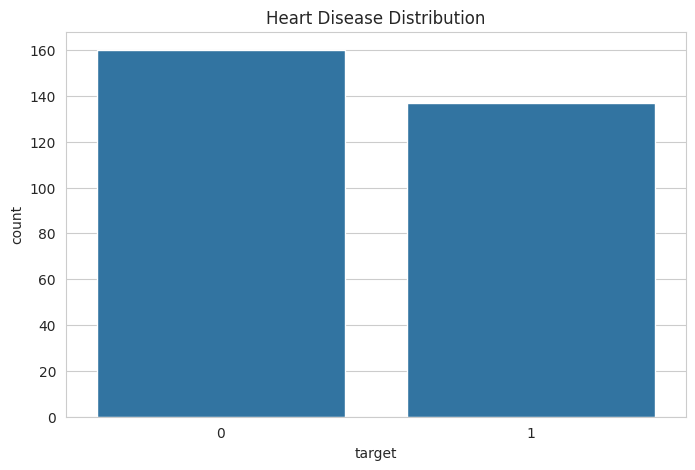

In [10]:
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution")
plt.show()


🔹 Correlation Heatmap

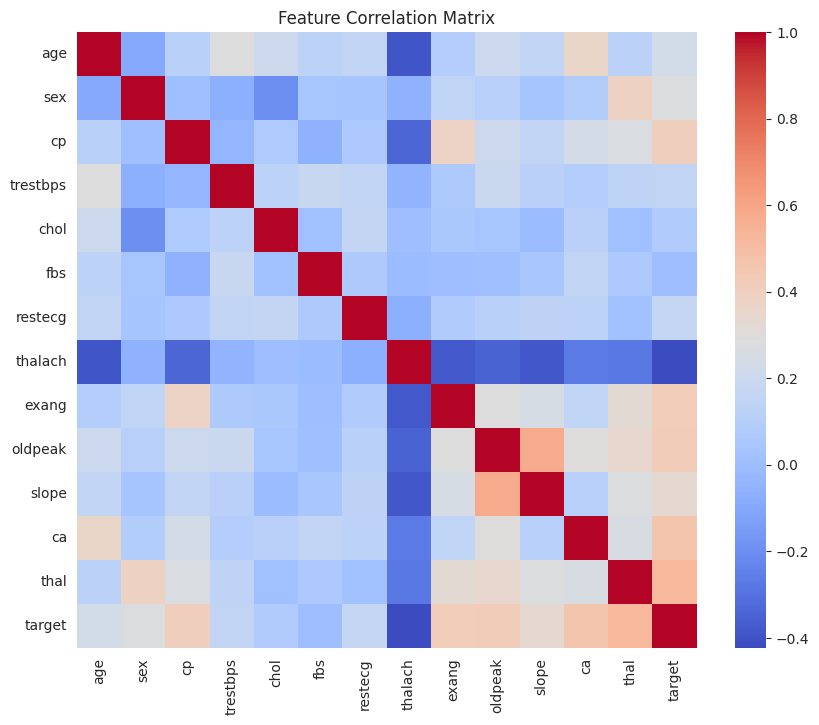

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


Age vs Heart Disease

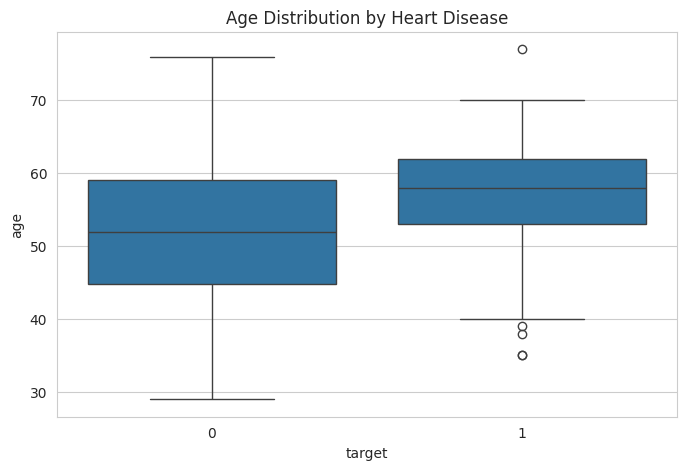

In [12]:
sns.boxplot(x="target", y="age", data=df)
plt.title("Age Distribution by Heart Disease")
plt.show()


Train-Test Split

In [13]:
  X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Logistic Regression

In [15]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

accuracy_score(y_test, y_pred)


0.8666666666666667

Confusion Matrix

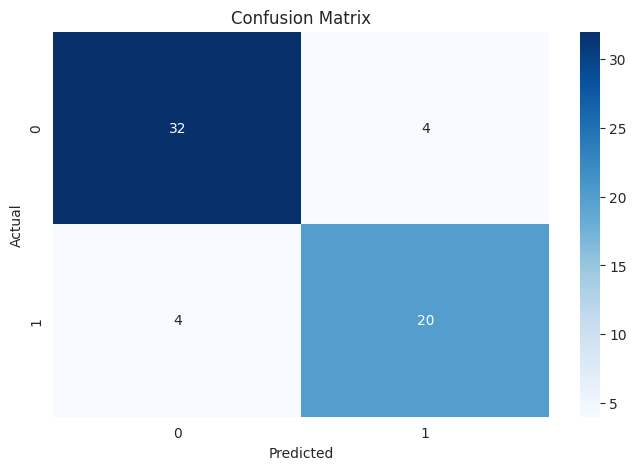

In [16]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

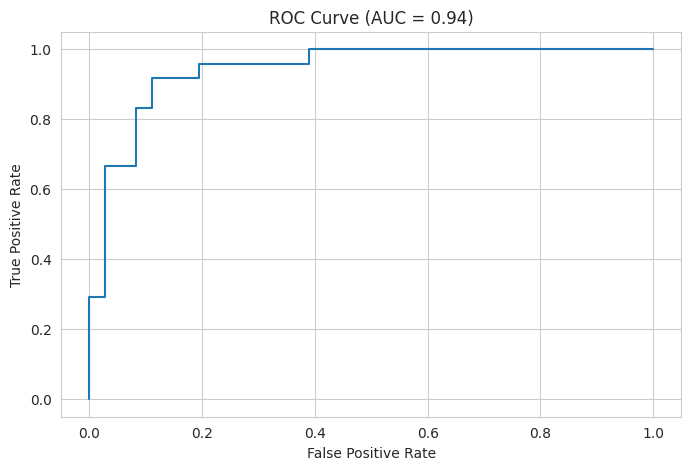

In [17]:
y_prob = log_model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc:.2f})")
plt.show()


Feature Importance (Logistic Coefficients)

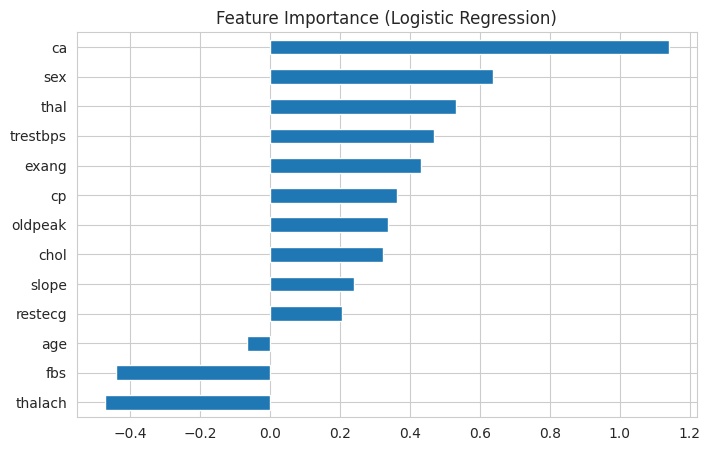

In [18]:
importance = pd.Series(log_model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression)")
plt.show()


Final Conclusion

## Final Conclusion

The dataset was successfully cleaned and preprocessed by handling missing values and converting the target variable into binary classification.

Exploratory Data Analysis showed meaningful relationships between several medical features and heart disease risk.

A Logistic Regression model was trained and evaluated using:
- Accuracy Score
- Confusion Matrix
- ROC Curve (AUC)

The model demonstrated good predictive performance, indicating that medical attributes such as chest pain type, maximum heart rate, and cholesterol contribute significantly to heart disease prediction.

This model can serve as a basic decision-support tool for early risk identification.